In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [2]:
x=np.asarray([i for i in range(1,21)])

In [3]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [4]:
y=np.round(np.sin(x*np.pi/3),2)

In [5]:
y

array([ 0.87,  0.87,  0.  , -0.87, -0.87, -0.  ,  0.87,  0.87,  0.  ,
       -0.87, -0.87, -0.  ,  0.87,  0.87,  0.  , -0.87, -0.87, -0.  ,
        0.87,  0.87])

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

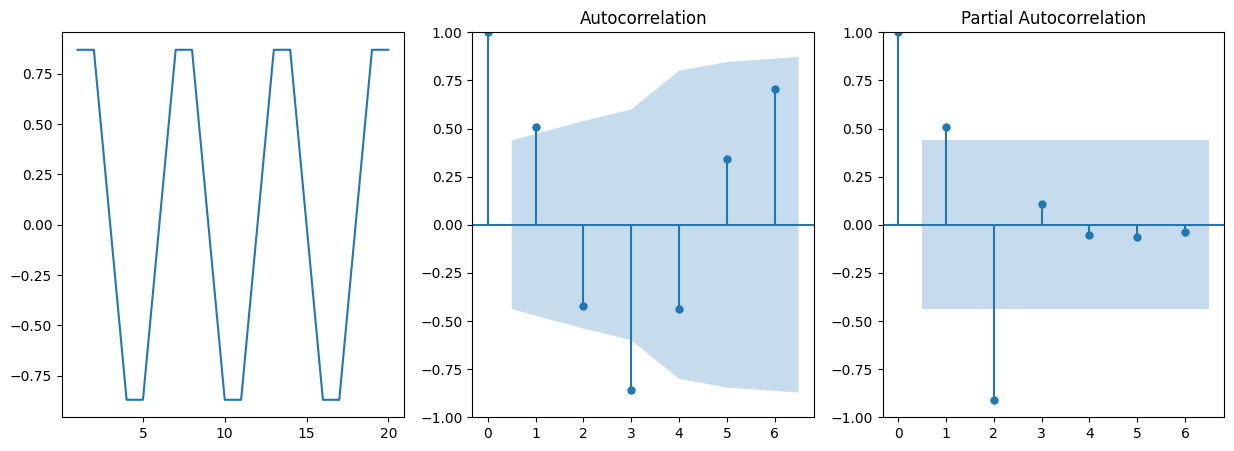

In [8]:
fig, axes=plt.subplots(1,3)
fig.set_size_inches(15,5)
axes[0].plot(x,y)
plot_acf(y,lags=6,ax=axes[1]);
plot_pacf(y,lags=6,ax=axes[2]);

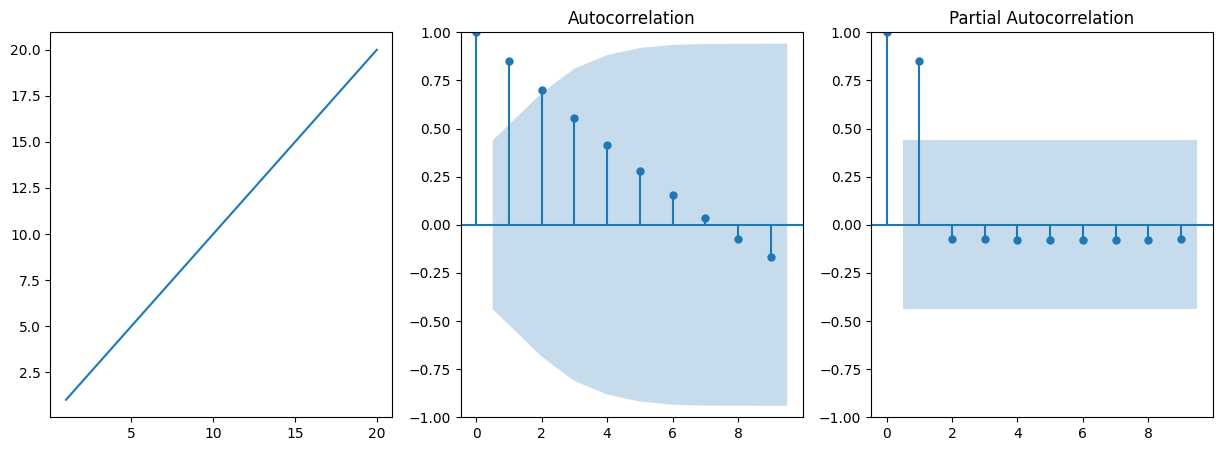

In [9]:
y2=x
fig, axes =plt.subplots(1,3)
fig.set_size_inches(15,5)
axes[0].plot(x,y2)
plot_acf(y2,lags=9,ax=axes[1]);
plot_pacf(y2,lags=9,ax=axes[2]);

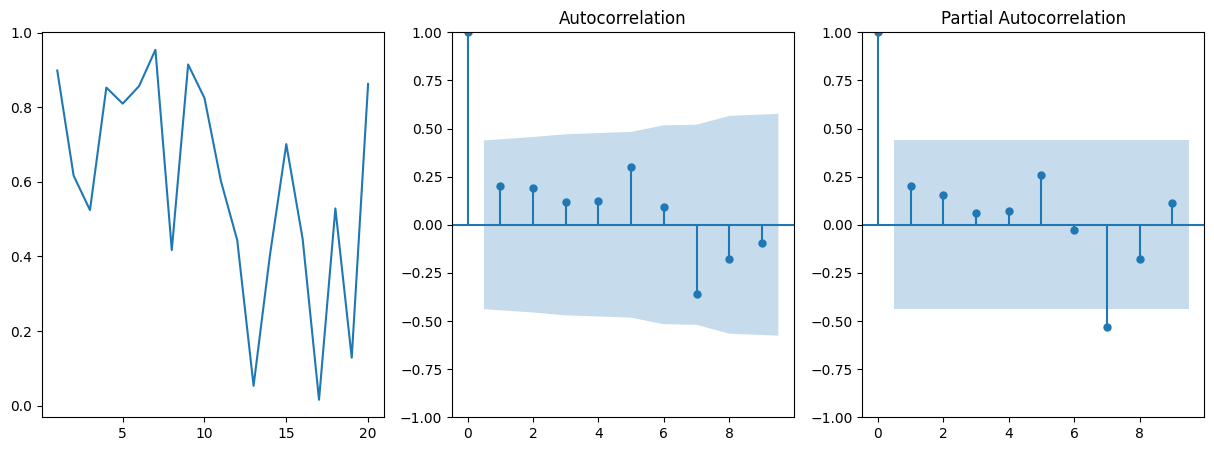

In [31]:
y3=np.random.random(20)
fig, axes =plt.subplots(1,3)
fig.set_size_inches(15,5)
axes[0].plot(x,y3)
plot_acf(y3,lags=9,ax=axes[1]);
plot_pacf(y3,lags=9,ax=axes[2]);

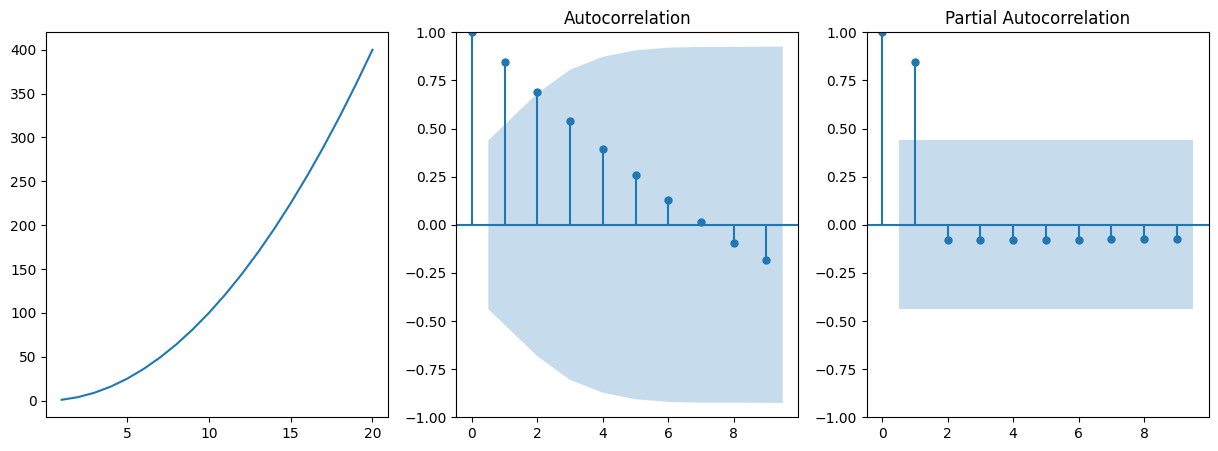

In [32]:
y4=x*x
fig, axes =plt.subplots(1,3)
fig.set_size_inches(15,5)
axes[0].plot(x,y4)
plot_acf(y4,lags=9,ax=axes[1]);
plot_pacf(y4,lags=9,ax=axes[2]);

In [33]:
from statsmodels.tsa.stattools import adfuller
resultado=adfuller(y,maxlag=1)
print("p-value=",resultado[1])

p-value= 0.0


Dado que p<0.05 la serie es estacionaria

In [34]:
resultado=adfuller(y2,maxlag=1)
print("p-value=",resultado[1])

p-value= 0.4105532292195778


dado que p>0.05 la serie no es estacionaria

In [35]:
resultado=adfuller(y3,maxlag=1)
print("p-value=",resultado[1])

p-value= 0.012360529064363747


In [36]:
resultado=adfuller(y4,maxlag=1)
print("p-value=",resultado[1])

p-value= 0.9874395113422361


In [37]:
from statsmodels.tsa.arima.model import ARIMA

In [51]:
modelo=ARIMA(y,order=(1,0,1))
predictor=modelo.fit()
print("MSE",predictor.mse)
predictor.summary()

MSE 0.16214547944804542


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  -9.579
Date:                Fri, 13 Dec 2024   AIC                             27.157
Time:                        21:10:39   BIC                             31.140
Sample:                             0   HQIC                            27.935
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1535      0.305      0.502      0.615      -0.445       0.752
ar.L1          0.4962      0.294      1.688      0.091      -0.080       1.072
ma.L1          0.9998    235.712      0.004      0.997    -460.987     462.986
sigma2         0.1243     29.310      0.004      0.997     -57.323      57.572
===================================================================================
Ljung-Box (L1) (Q):                   4.83   Jarque-Bera (JB):                 1.88
Prob(Q):                              0.03   Prob(JB):                         0.39
Heteroskedasticity (H):               0.81   Skew:                            -0.16
Prob(H) (two-sided):                  0.79   Kurtosis:                         1.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
modelo=ARIMA(y,order=(2,0,3))
predictor=modelo.fit()
print("MSE",predictor.mse)
predictor.summary()

MSE 0.04730505877862737


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(2, 0, 3)   Log Likelihood                 135.919
Date:                Fri, 13 Dec 2024   AIC                           -257.837
Time:                        21:10:42   BIC                           -250.867
Sample:                             0   HQIC                          -256.477
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.031e-06      0.000      0.018      0.986      -0.000       0.000
ar.L1          1.0001      0.001   1277.097      0.000       0.999       1.002
ar.L2         -1.0000   7.99e-07  -1.25e+06      0.000      -1.000      -1.000
ma.L1          1.0000   2.16e-07   4.63e+06      0.000       1.000       1.000
ma.L2         -1.0000   2.16e-07  -4.63e+06      0.000      -1.000      -1.000
ma.L3         -1.0000   2.16e-07  -4.64e+06      0.000      -1.000      -1.000
sigma2      9.555e-09   6.85e-09      1.394      0.163   -3.88e-09     2.3e-08
===================================================================================
Ljung-Box (L1) (Q):                   3.82   Jarque-Bera (JB):                72.80
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                             2.92
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.5e+23. Standard errors may be unstable.
"""

In [54]:
x_p=[i+len(x)+1 for i in range(len(x))]

In [55]:
modelo_pred=predictor.get_forecast(steps=len(y))
modelo_ci=modelo_pred.conf_int(0.05)

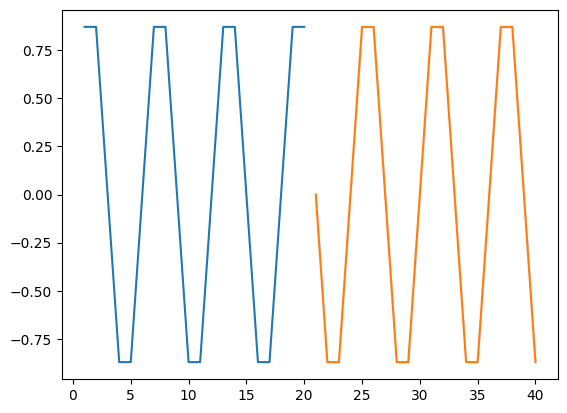

In [56]:
plt.plot(x,y,x_p,modelo_pred.predicted_mean)
plt.fill_between(x_p,modelo_ci[:,0],modelo_ci[:,1],color="b",alpha=.15)

In [57]:
modelo=ARIMA(y2,order=(1,0,1))
predictor=modelo.fit()
print("MSE",predictor.mse)
predictor.summary()

MSE 4.815508082559826


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -19.452
Date:                Fri, 13 Dec 2024   AIC                             46.903
Time:                        21:12:49   BIC                             50.886
Sample:                             0   HQIC                            47.681
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4992      9.718      1.080      0.280      -8.547      29.546
ar.L1          0.9943      0.047     21.138      0.000       0.902       1.087
ma.L1          0.9997    237.630      0.004      0.997    -464.747     466.746
sigma2         0.2630     62.403      0.004      0.997    -122.044     122.570
===================================================================================
Ljung-Box (L1) (Q):                   1.11   Jarque-Bera (JB):               180.77
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                            -3.67
Prob(H) (two-sided):                  0.98   Kurtosis:                        15.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Haremos una diferencia de la serie para volverla estacionaria
d=1

In [60]:
modelo=ARIMA(y2,order=(1,1,1))
predictor=modelo.fit()
print("MSE",predictor.mse)
predictor.summary()

MSE 0.09999999663478788


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  89.574
Date:                Fri, 13 Dec 2024   AIC                           -173.148
Time:                        21:15:09   BIC                           -170.314
Sample:                             0   HQIC                          -172.668
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999   4.38e-05   2.28e+04      0.000       1.000       1.000
ma.L1          0.9997   4.82e-12   2.07e+11      0.000       1.000       1.000
sigma2      2.495e-06   1.18e-06      2.123      0.034    1.92e-07     4.8e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               207.23
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             4.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.99e+25. Standard errors may be unstable.
"""

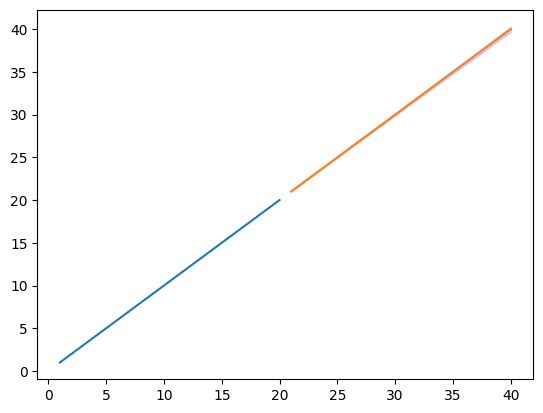

In [61]:
modelo_pred=predictor.get_forecast(steps=len(y2))
modelo_ci=modelo_pred.conf_int(0.05)
plt.plot(x,y2,x_p,modelo_pred.predicted_mean)
plt.fill_between(x_p,modelo_ci[:,0],modelo_ci[:,1],color="b",alpha=.15)

In [68]:
modelo=ARIMA(y4,order=(1,2,1))
predictor=modelo.fit()
print("MSE",predictor.mse)
predictor.summary()

MSE 0.5624996147836232


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(1, 2, 1)   Log Likelihood                  69.727
Date:                Fri, 13 Dec 2024   AIC                           -133.454
Time:                        21:19:03   BIC                           -130.783
Sample:                             0   HQIC                          -133.085
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999   5.61e-05   1.78e+04      0.000       1.000       1.000
ma.L1          0.9994   5.38e-11   1.86e+10      0.000       0.999       0.999
sigma2      1.252e-05   6.07e-06      2.064      0.039    6.29e-07    2.44e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               173.07
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             3.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.87e+23. Standard errors may be unstable.
"""

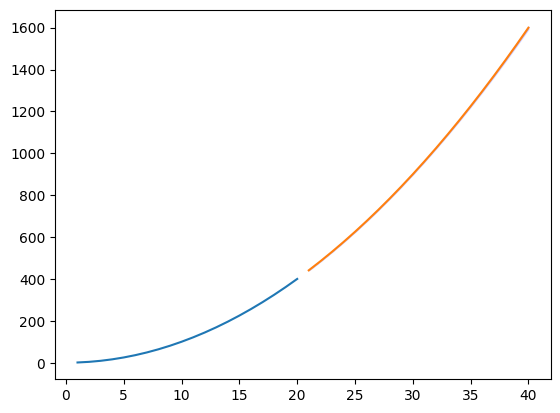

In [69]:
modelo_pred=predictor.get_forecast(steps=len(y4))
modelo_ci=modelo_pred.conf_int(0.05)
plt.plot(x,y4,x_p,modelo_pred.predicted_mean)
plt.fill_between(x_p,modelo_ci[:,0],modelo_ci[:,1],color="b",alpha=.15)